# Team_Project

In [1]:
setwd('d:/workspace/R_practice/data/R_data')

In [2]:
getwd()

[1] "d:/workspace/R_practice/data/R_data"

In [3]:
library('dplyr')
library('ggplot2')
library('car')
# library('corrplot')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



In [4]:
# install.packages('corrplot')

In [5]:
data = read.csv('sales_data_1.csv')
head(data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [6]:
fruit_data = data %>%
                filter(CATEGORY == '과즙음료')
vitamin_data = data %>%
                filter(CATEGORY == '비타민음료')
tea_data = data %>%
            filter(CATEGORY == '차음료')
head(fruit_data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [7]:
a = cor(fruit_data[,c(4:10)])

In [8]:
# corrplot(a, method="number", col = rainbow(1000))

ERROR: Error in corrplot(a, method = "number", col = rainbow(1000)): 함수 "corrplot"를 찾을 수 없습니다


In [ ]:
b = cor(vitamin_data[,c(4:10)])

In [ ]:
b

In [ ]:
corrplot(b, method="number", col = rainbow(1000))

In [ ]:
c = cor(tea_data[,c(4:10)])

In [ ]:
corrplot(c, method="number", col = rainbow(1000))

In [10]:
library('leaps')

Warning message:
"package 'leaps' was built under R version 3.6.3"

## 과즙 음료 모델 정의 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [11]:
leaps = regsubsets(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = fruit_data, nbest = 5)
summary(leaps)

Subset selection object
Call: regsubsets.formula(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = fruit_data, nbest = 5)
7 Variables  (and intercept)
         Forced in Forced out
YM           FALSE      FALSE
ITEM_CNT     FALSE      FALSE
PRICE        FALSE      FALSE
MAXTEMP      FALSE      FALSE
SALEDAY      FALSE      FALSE
RAIN_DAY     FALSE      FALSE
HOLIDAY      FALSE      FALSE
5 subsets of each size up to 7
Selection Algorithm: exhaustive
         YM  ITEM_CNT PRICE MAXTEMP SALEDAY RAIN_DAY HOLIDAY
1  ( 1 ) " " " "      " "   "*"     " "     " "      " "    
1  ( 2 ) " " "*"      " "   " "     " "     " "      " "    
1  ( 3 ) " " " "      " "   " "     "*"     " "      " "    
1  ( 4 ) "*" " "      " "   " "     " "     " "      " "    
1  ( 5 ) " " " "      " "   " "     " "     "*"      " "    
2  ( 1 ) " " "*"      " "   "*"     " "     " "      " "    
2  ( 2 ) "*" " "      " "   "*"     " "     " "      " "    
2  ( 3 ) " " " "      " " 

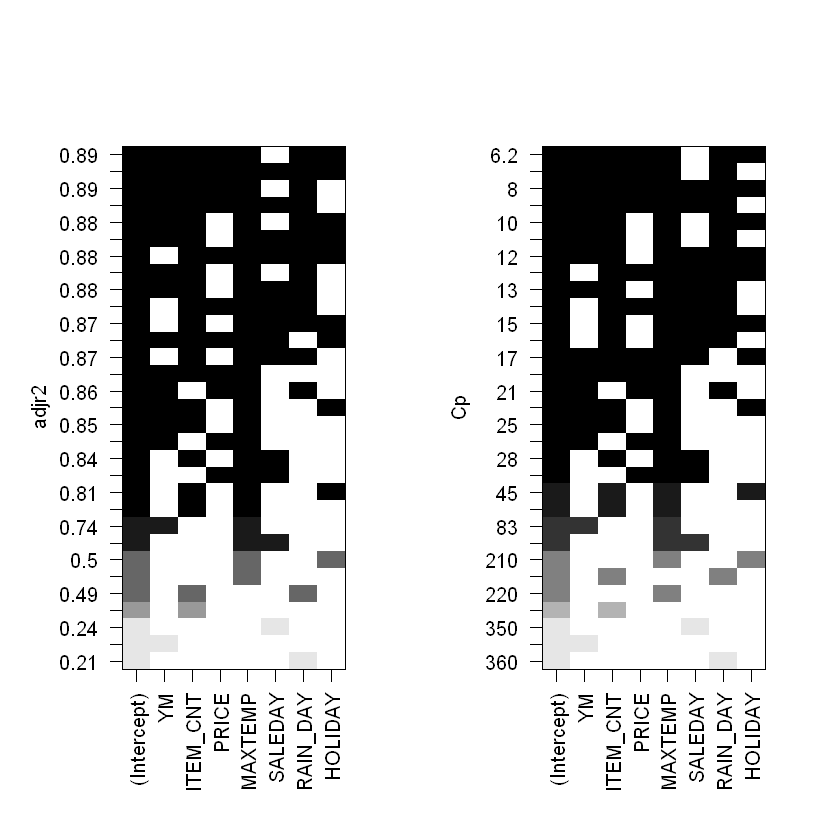

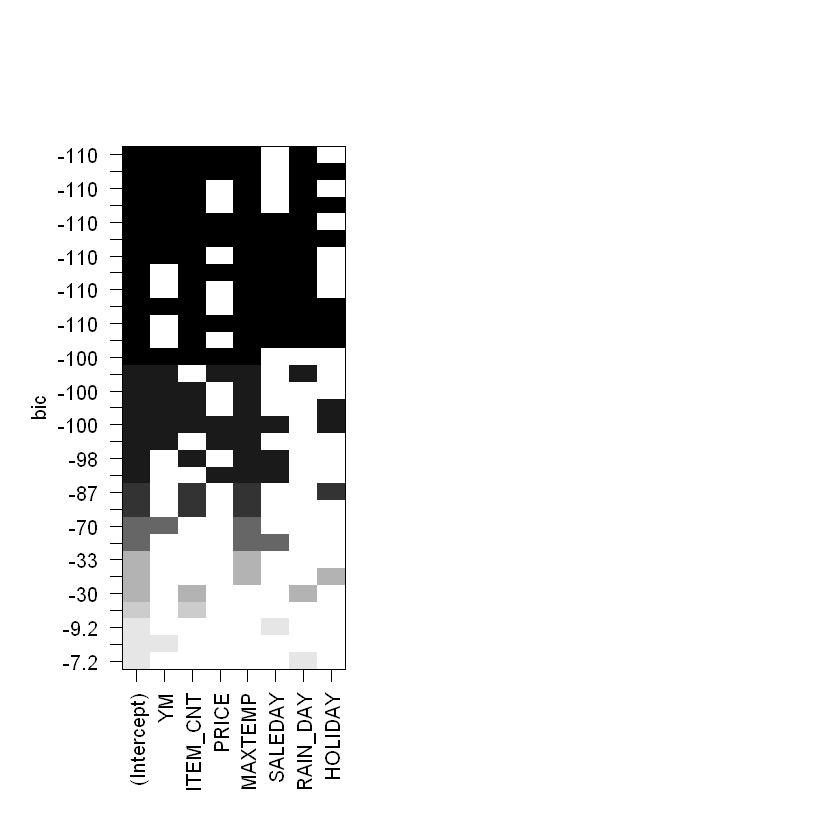

In [12]:
par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [49]:
# SALEDAY 빠짐
a = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + 
    HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-492.97 -123.46   -6.15   93.01  576.50 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.265e+05  7.923e+04  -5.383 1.70e-06 ***
YM           2.115e+00  3.938e-01   5.370 1.78e-06 ***
ITEM_CNT     1.911e+01  4.685e+00   4.080 0.000152 ***
PRICE        3.210e-01  1.326e-01   2.421 0.018953 *  
MAXTEMP      5.457e+01  3.878e+00  14.073  < 2e-16 ***
RAIN_DAY    -1.293e-02  3.772e-03  -3.429 0.001181 ** 
HOLIDAY      4.013e+01  2.315e+01   1.733 0.088824 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.3 on 53 degrees of freedom
Multiple R-squared:  0.9037,	Adjusted R-squared:  0.8928 
F-statistic: 82.94 on 6 and 53 DF,  p-value: < 2.2e-16


In [50]:
vif(a)

YM ITEM_CNT    PRICE  MAXTEMP RAIN_DAY  HOLIDAY 
4.373501 2.902500 3.150894 1.979835 2.064419 1.044786

In [54]:
# PRICE 빠짐
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, 
    data = fruit_data)

Residuals:
   Min     1Q Median     3Q    Max 
-414.3 -128.5   15.8   86.6  606.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.721e+05  4.907e+04  -5.546 9.02e-07 ***
YM           1.349e+00  2.447e-01   5.511 1.02e-06 ***
ITEM_CNT     2.712e+01  3.464e+00   7.830 1.86e-10 ***
MAXTEMP      5.332e+01  4.012e+00  13.289  < 2e-16 ***
RAIN_DAY    -1.409e-02  3.907e-03  -3.606 0.000678 ***
HOLIDAY      4.162e+01  2.416e+01   1.723 0.090659 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 215.4 on 54 degrees of freedom
Multiple R-squared:  0.8931,	Adjusted R-squared:  0.8832 
F-statistic: 90.23 on 5 and 54 DF,  p-value: < 2.2e-16


In [55]:
vif(a)

YM ITEM_CNT  MAXTEMP RAIN_DAY  HOLIDAY 
1.549902 1.455614 1.944580 2.031359 1.044045

In [58]:
# RAIN_DAY 빠짐
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-497.98 -144.79    9.68   94.97  724.57 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.316e+05  5.272e+04  -4.393 5.14e-05 ***
YM           1.147e+00  2.630e-01   4.362 5.70e-05 ***
ITEM_CNT     2.650e+01  3.818e+00   6.941 4.72e-09 ***
MAXTEMP      4.334e+01  3.207e+00  13.514  < 2e-16 ***
HOLIDAY      5.141e+01  2.650e+01   1.940   0.0575 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 237.8 on 55 degrees of freedom
Multiple R-squared:  0.8674,	Adjusted R-squared:  0.8577 
F-statistic: 89.91 on 4 and 55 DF,  p-value: < 2.2e-16


In [59]:
vif(a)

YM ITEM_CNT  MAXTEMP  HOLIDAY 
1.469104 1.452036 1.019851 1.030869

In [65]:
cor.test(fruit_data$YM, fruit_data$QTY)


	Pearson's product-moment correlation

data:  fruit_data$YM and fruit_data$QTY
t = 4.1858, df = 58, p-value = 9.765e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2594775 0.6554277
sample estimates:
      cor 
0.4816663 


In [64]:
# HOLIDAY 빠짐
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-449.27 -140.25   -5.38   80.76  752.07 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.488e+05  5.324e+04  -4.674 1.90e-05 ***
YM           1.236e+00  2.654e-01   4.656 2.02e-05 ***
ITEM_CNT     2.583e+01  3.895e+00   6.630 1.41e-08 ***
MAXTEMP      4.344e+01  3.285e+00  13.222  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 243.6 on 56 degrees of freedom
Multiple R-squared:  0.8583,	Adjusted R-squared:  0.8507 
F-statistic:   113 on 3 and 56 DF,  p-value: < 2.2e-16


In [61]:
vif(a)

YM ITEM_CNT  MAXTEMP 
1.425152 1.440001 1.019623

In [62]:
cor.test(fruit_data$ITEM_CNT, fruit_data$QTY)


	Pearson's product-moment correlation

data:  fruit_data$ITEM_CNT and fruit_data$QTY
t = 6.0358, df = 58, p-value = 1.189e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4359612 0.7558404
sample estimates:
      cor 
0.6211264 


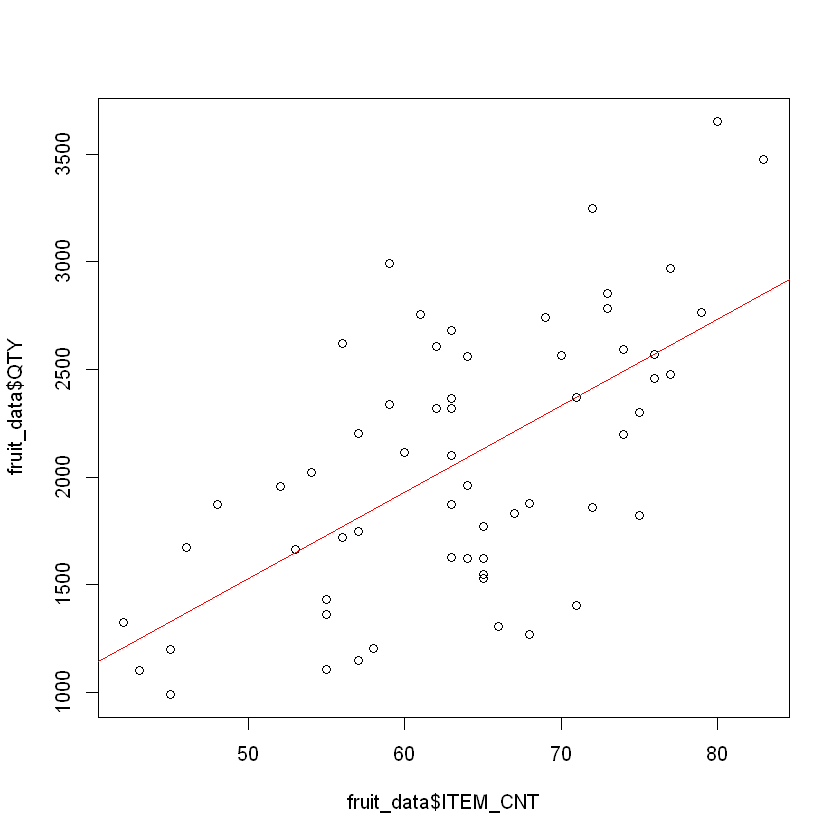

In [63]:
a = lm(QTY ~ ITEM_CNT, data = fruit_data)
plot(fruit_data$ITEM_CNT, fruit_data$QTY)
abline(a, col = 2)

## ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [17]:
cor(fruit_data$PRICE, fruit_data$QTY)

[1] -0.09838038

In [18]:
a = lm(QTY ~ PRICE, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ PRICE, data = fruit_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1089.35  -483.42   -47.06   430.13  1665.92 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2529.6461   610.3934   4.144 0.000112 ***
PRICE         -0.1725     0.2291  -0.753 0.454558    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 632.7 on 58 degrees of freedom
Multiple R-squared:  0.009679,	Adjusted R-squared:  -0.007396 
F-statistic: 0.5669 on 1 and 58 DF,  p-value: 0.4546


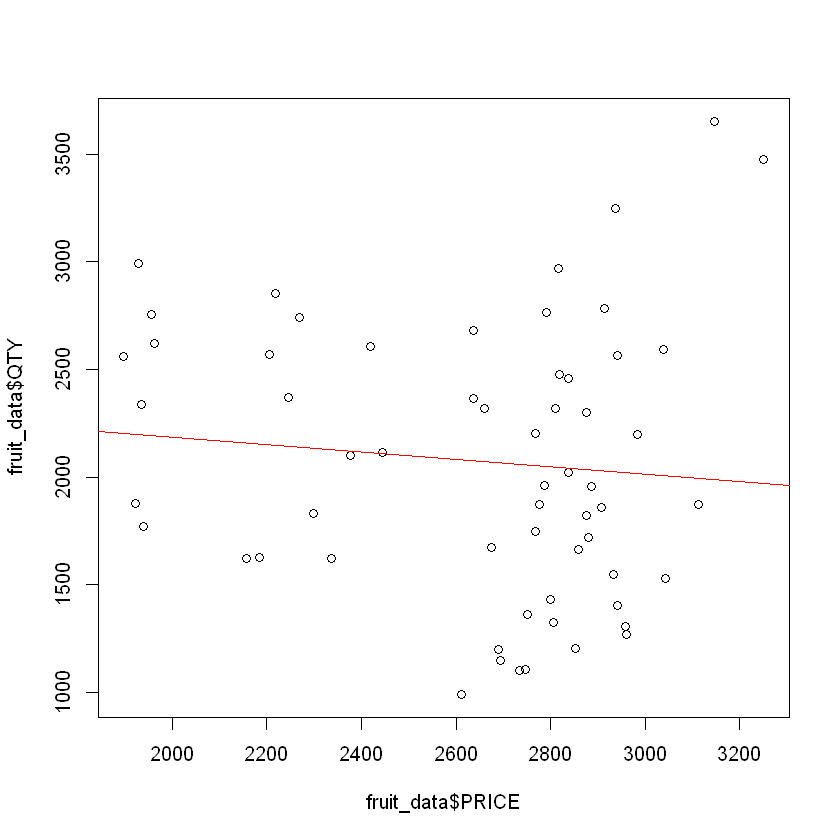

In [19]:
plot(fruit_data$PRICE, fruit_data$QTY)
abline(a, col = 2)

In [20]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-559.08 -172.49   11.84  146.27  556.08 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.689e+03  3.637e+02  -4.644 2.17e-05 ***
ITEM_CNT     3.713e+01  3.652e+00  10.168 3.06e-14 ***
MAXTEMP      4.838e+01  4.844e+00   9.987 5.85e-14 ***
RAIN_DAY    -9.173e-03  4.711e-03  -1.947   0.0566 .  
HOLIDAY      6.732e+01  2.936e+01   2.293   0.0257 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 266.8 on 55 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8208 
F-statistic: 68.57 on 4 and 55 DF,  p-value: < 2.2e-16


In [21]:
cor(fruit_data$RAIN_DAY, fruit_data$QTY)

[1] 0.4756766

In [22]:
a = lm(QTY ~ RAIN_DAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ RAIN_DAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-815.94 -441.85   -1.32  263.85 1790.09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.802e+03  9.796e+01  18.390  < 2e-16 ***
RAIN_DAY    2.930e-02  7.115e-03   4.118 0.000123 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 559.2 on 58 degrees of freedom
Multiple R-squared:  0.2263,	Adjusted R-squared:  0.2129 
F-statistic: 16.96 on 1 and 58 DF,  p-value: 0.0001225


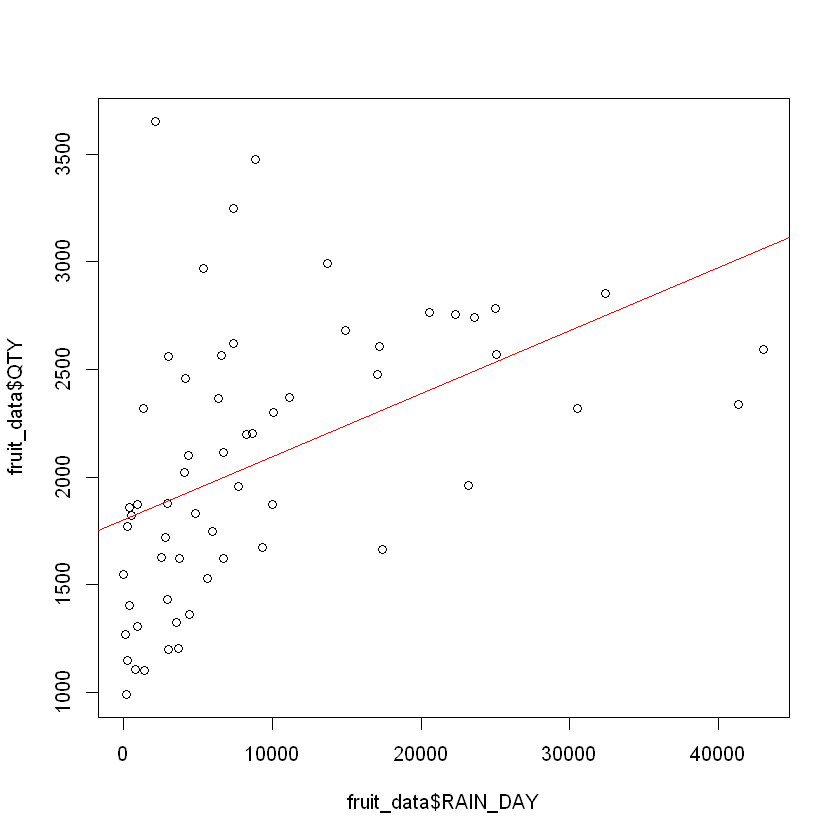

In [23]:
plot(fruit_data$RAIN_DAY, fruit_data$QTY)
abline(a, col = 2)

In [24]:
# 설명력이 0.01수준 달라짐
a = lm(QTY ~ ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)

Residuals:
   Min     1Q Median     3Q    Max 
-631.6 -221.0   13.0  144.6  685.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1609.330    370.266  -4.346 5.89e-05 ***
ITEM_CNT       35.682      3.663   9.741 1.17e-13 ***
MAXTEMP        42.030      3.671  11.448 2.72e-16 ***
HOLIDAY        71.405     30.008   2.380   0.0208 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 273.4 on 56 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8119 
F-statistic: 85.88 on 3 and 56 DF,  p-value: < 2.2e-16


In [25]:
bartlett.test(QTY ~ as.factor(HOLIDAY), data = fruit_data)


	Bartlett test of homogeneity of variances

data:  QTY by as.factor(HOLIDAY)
Bartlett's K-squared = 4.7898, df = 4, p-value = 0.3096


In [26]:
a = aov(QTY ~ as.factor(HOLIDAY), data = fruit_data)
summary(a)

                   Df   Sum Sq Mean Sq F value Pr(>F)  
as.factor(HOLIDAY)  4  4900849 1225212   3.634 0.0107 *
Residuals          55 18541111  337111                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [27]:
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = QTY ~ as.factor(HOLIDAY), data = fruit_data)

$`as.factor(HOLIDAY)`
            diff         lwr        upr     p adj
9-8    163.10317  -420.42361  746.62996 0.9329426
10-8   714.65179   115.38157 1313.92201 0.0117936
11-8    29.08929  -696.66299  754.84156 0.9999619
12-8   143.21429  -785.17115 1071.59972 0.9923413
10-9   551.54861   -11.08969 1114.18691 0.0572624
11-9  -134.01389  -829.82523  561.79746 0.9823274
12-9   -19.88889  -925.06101  885.28323 0.9999965
11-10 -685.56250 -1394.62859   23.50359 0.0627195
12-10 -571.43750 -1486.83788  343.96288 0.4066145
12-11  114.12500  -888.64588 1116.89588 0.9976323


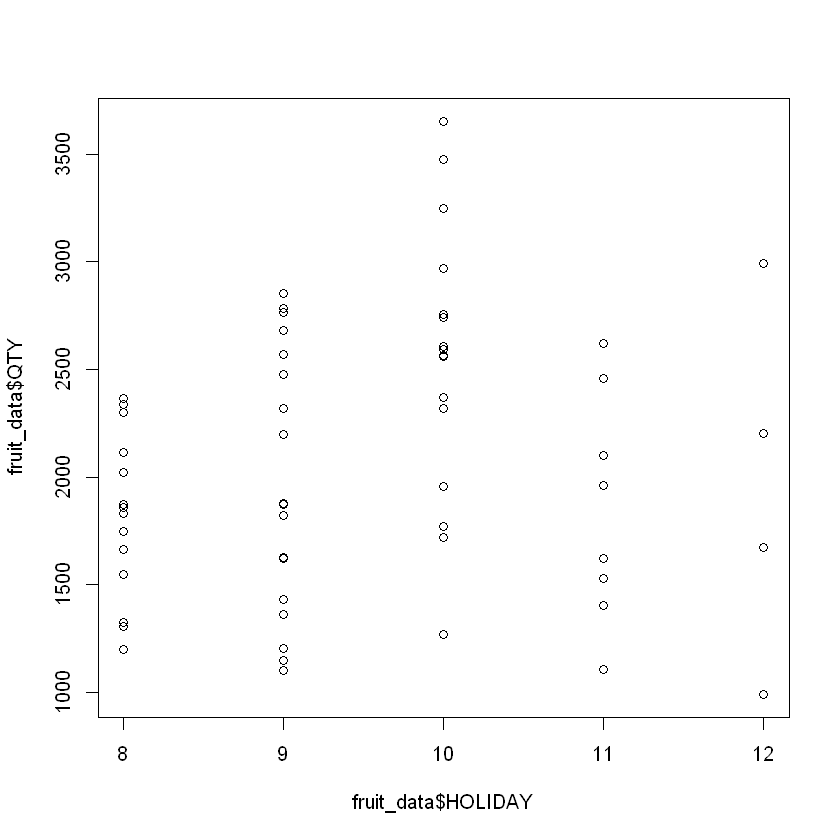

In [28]:
plot(fruit_data$HOLIDAY, fruit_data$QTY)

In [29]:
# 과즙음료 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-524.38 -163.69  -32.57  162.39  725.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -933.680    247.168  -3.778  0.00038 ***
ITEM_CNT      35.727      3.810   9.378 3.76e-13 ***
MAXTEMP       42.019      3.819  11.004 1.01e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 284.3 on 57 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.7965 
F-statistic: 116.5 on 2 and 57 DF,  p-value: < 2.2e-16


In [30]:
vif(a)

ITEM_CNT  MAXTEMP 
1.010881 1.010881

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 차음료 모델 정의 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [31]:
leaps = regsubsets(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = tea_data, nbest = 5)
summary(leaps)

Subset selection object
Call: regsubsets.formula(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = tea_data, nbest = 5)
7 Variables  (and intercept)
         Forced in Forced out
YM           FALSE      FALSE
ITEM_CNT     FALSE      FALSE
PRICE        FALSE      FALSE
MAXTEMP      FALSE      FALSE
SALEDAY      FALSE      FALSE
RAIN_DAY     FALSE      FALSE
HOLIDAY      FALSE      FALSE
5 subsets of each size up to 7
Selection Algorithm: exhaustive
         YM  ITEM_CNT PRICE MAXTEMP SALEDAY RAIN_DAY HOLIDAY
1  ( 1 ) " " " "      " "   "*"     " "     " "      " "    
1  ( 2 ) " " " "      " "   " "     "*"     " "      " "    
1  ( 3 ) "*" " "      " "   " "     " "     " "      " "    
1  ( 4 ) " " "*"      " "   " "     " "     " "      " "    
1  ( 5 ) " " " "      " "   " "     " "     "*"      " "    
2  ( 1 ) " " " "      " "   "*"     "*"     " "      " "    
2  ( 2 ) "*" " "      " "   "*"     " "     " "      " "    
2  ( 3 ) " " " "      "*"   

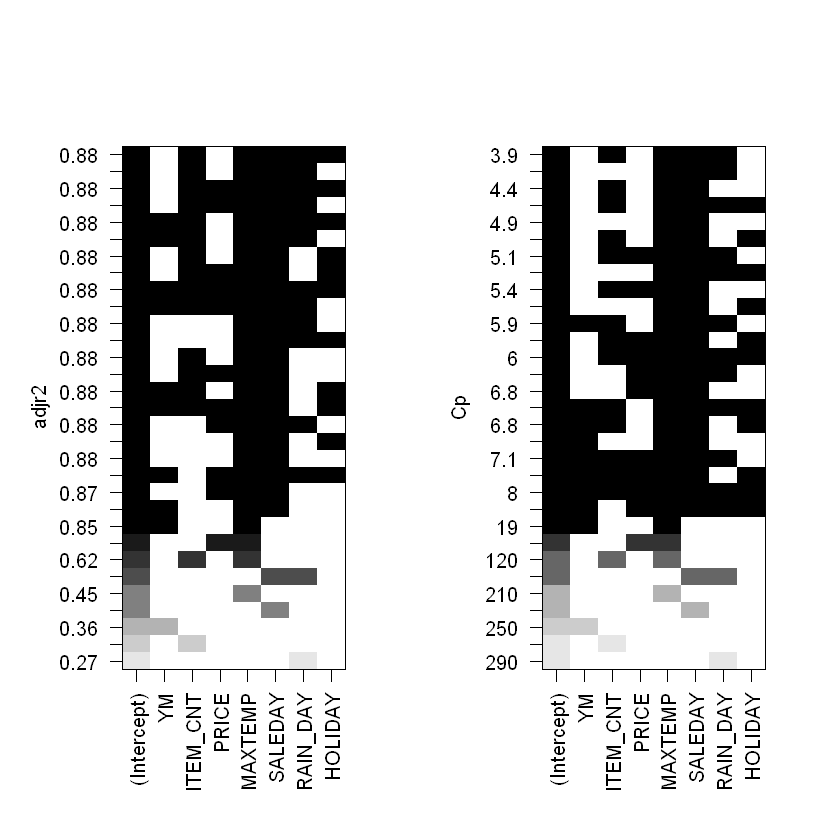

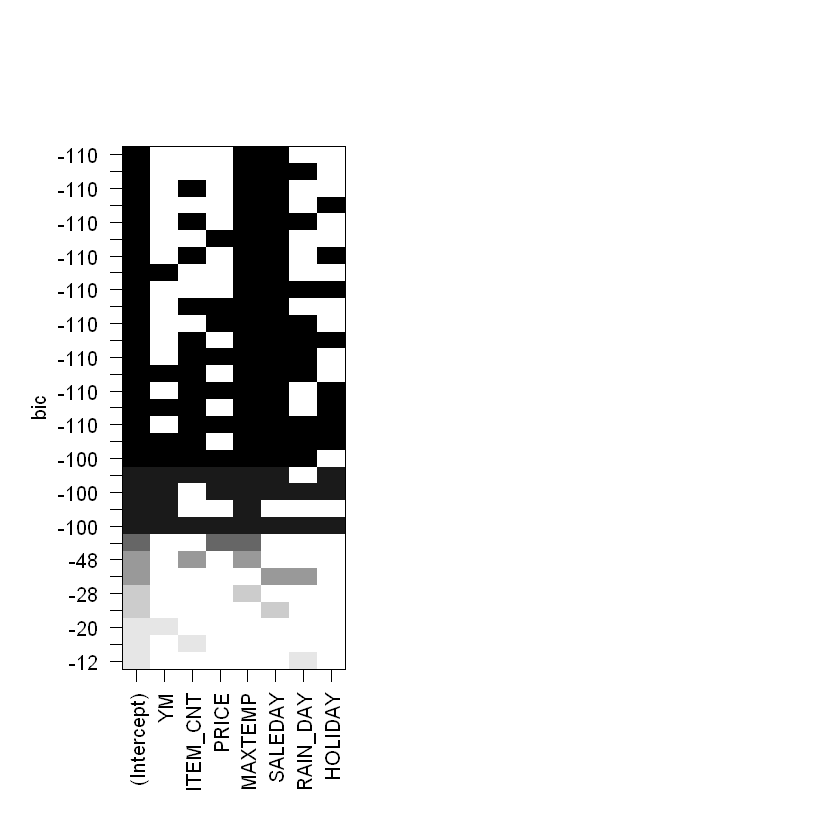

In [32]:
par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [33]:
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY + 
    HOLIDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-469.73 -126.70   -8.18   98.20  843.55 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.483e+04  1.618e+05   0.092 0.927287    
YM          -7.294e-02  8.064e-01  -0.090 0.928271    
ITEM_CNT    -2.075e+01  1.279e+01  -1.622 0.110759    
MAXTEMP      4.984e+01  4.338e+00  11.488 5.27e-16 ***
SALEDAY      1.155e-02  2.894e-03   3.992 0.000203 ***
RAIN_DAY    -5.914e-03  4.100e-03  -1.442 0.155060    
HOLIDAY      2.696e+01  2.533e+01   1.064 0.291994    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 226.2 on 53 degrees of freedom
Multiple R-squared:  0.8918,	Adjusted R-squared:  0.8796 
F-statistic: 72.81 on 6 and 53 DF,  p-value: < 2.2e-16


In [34]:
vif(a)

YM  ITEM_CNT   MAXTEMP   SALEDAY  RAIN_DAY   HOLIDAY 
15.267003  2.291920  2.062128 17.472330  2.029756  1.040853

In [35]:
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY, 
    data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.14 -153.76  -10.77  108.82  847.57 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.821e+03  1.619e+05   0.061 0.951858    
YM          -4.692e-02  8.070e-01  -0.058 0.953851    
ITEM_CNT    -1.996e+01  1.279e+01  -1.561 0.124384    
MAXTEMP      5.013e+01  4.334e+00  11.568 3.08e-16 ***
SALEDAY      1.156e-02  2.897e-03   3.990 0.000201 ***
RAIN_DAY    -6.424e-03  4.076e-03  -1.576 0.120876    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 226.4 on 54 degrees of freedom
Multiple R-squared:  0.8895,	Adjusted R-squared:  0.8793 
F-statistic: 86.93 on 5 and 54 DF,  p-value: < 2.2e-16


In [36]:
vif(a)

YM  ITEM_CNT   MAXTEMP   SALEDAY  RAIN_DAY 
15.252975  2.284222  2.053466 17.472213  2.001939

In [37]:
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


In [38]:
vif(a)

MAXTEMP  SALEDAY 
1.000684 1.000684

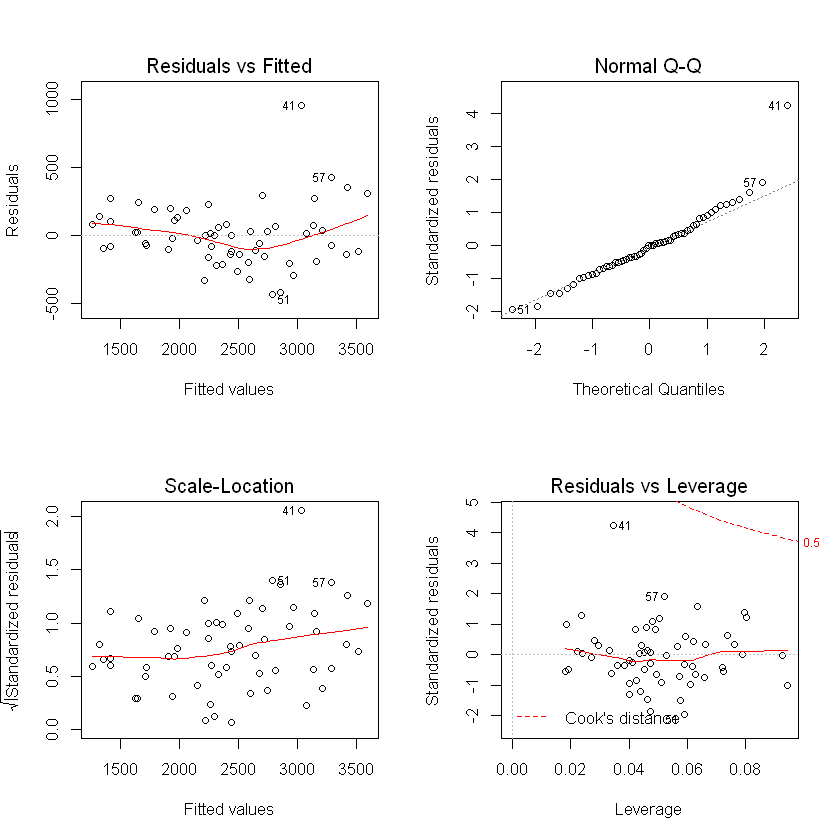

In [39]:
par(mfrow = c(2,2))
plot(a)

In [40]:
cor(tea_data$SALEDAY, tea_data$QTY)

[1] 0.6670658

In [41]:
a = lm(QTY ~ SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ SALEDAY, data = tea_data)

Residuals:
   Min     1Q Median     3Q    Max 
-923.2 -438.4  138.2  315.9 1232.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.550e+02  2.794e+02   1.986   0.0517 .  
SALEDAY     1.022e-02  1.499e-03   6.819  5.9e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 489.6 on 58 degrees of freedom
Multiple R-squared:  0.445,	Adjusted R-squared:  0.4354 
F-statistic:  46.5 on 1 and 58 DF,  p-value: 5.896e-09


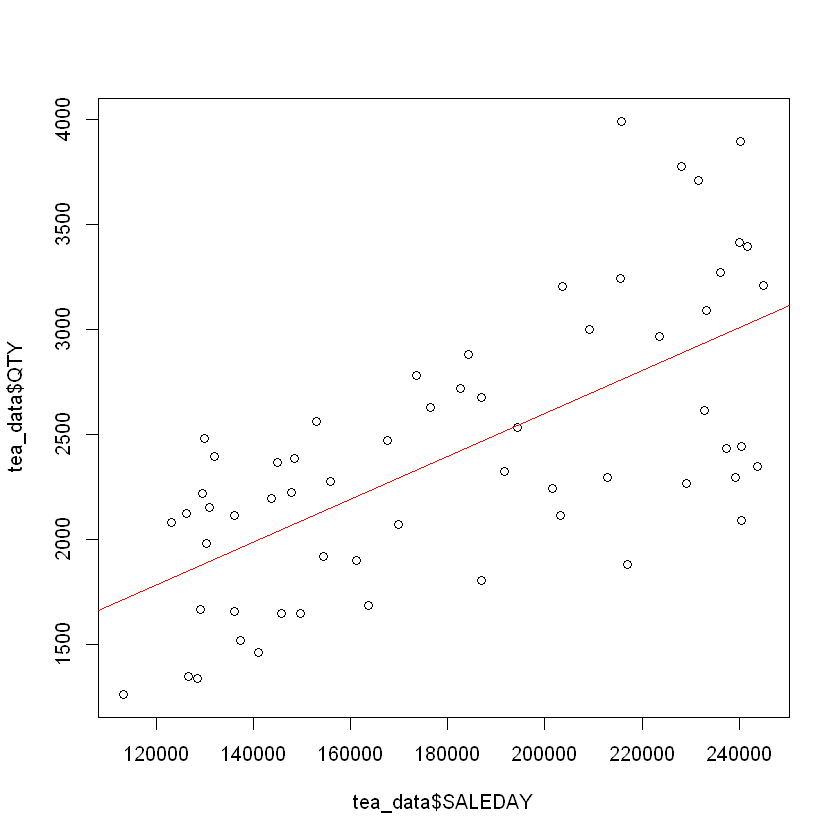

In [42]:
plot(tea_data$SALEDAY, tea_data$QTY)
abline(a, col = 2)

In [43]:
# 차음료 최종 모델
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 비타민 음료 모델 정의

In [44]:
leaps = regsubsets(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = vitamin_data, nbest = 5)
summary(leaps)

Subset selection object
Call: regsubsets.formula(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = vitamin_data, nbest = 5)
7 Variables  (and intercept)
         Forced in Forced out
YM           FALSE      FALSE
ITEM_CNT     FALSE      FALSE
PRICE        FALSE      FALSE
MAXTEMP      FALSE      FALSE
SALEDAY      FALSE      FALSE
RAIN_DAY     FALSE      FALSE
HOLIDAY      FALSE      FALSE
5 subsets of each size up to 7
Selection Algorithm: exhaustive
         YM  ITEM_CNT PRICE MAXTEMP SALEDAY RAIN_DAY HOLIDAY
1  ( 1 ) " " "*"      " "   " "     " "     " "      " "    
1  ( 2 ) " " " "      "*"   " "     " "     " "      " "    
1  ( 3 ) " " " "      " "   " "     "*"     " "      " "    
1  ( 4 ) "*" " "      " "   " "     " "     " "      " "    
1  ( 5 ) " " " "      " "   " "     " "     "*"      " "    
2  ( 1 ) " " " "      "*"   "*"     " "     " "      " "    
2  ( 2 ) " " "*"      " "   " "     " "     "*"      " "    
2  ( 3 ) " " "*"      " 

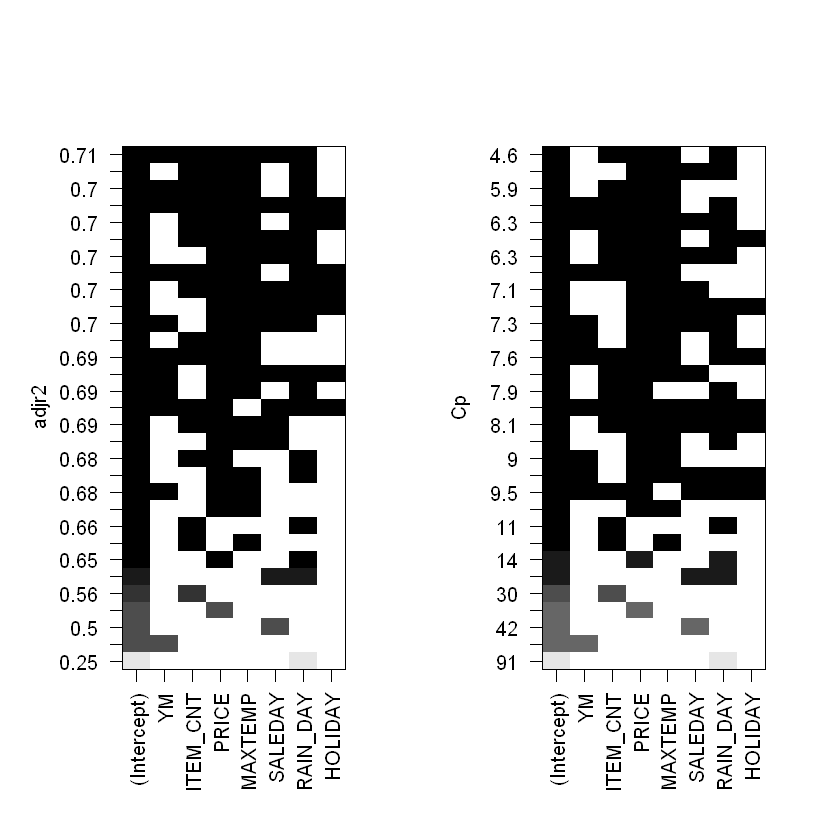

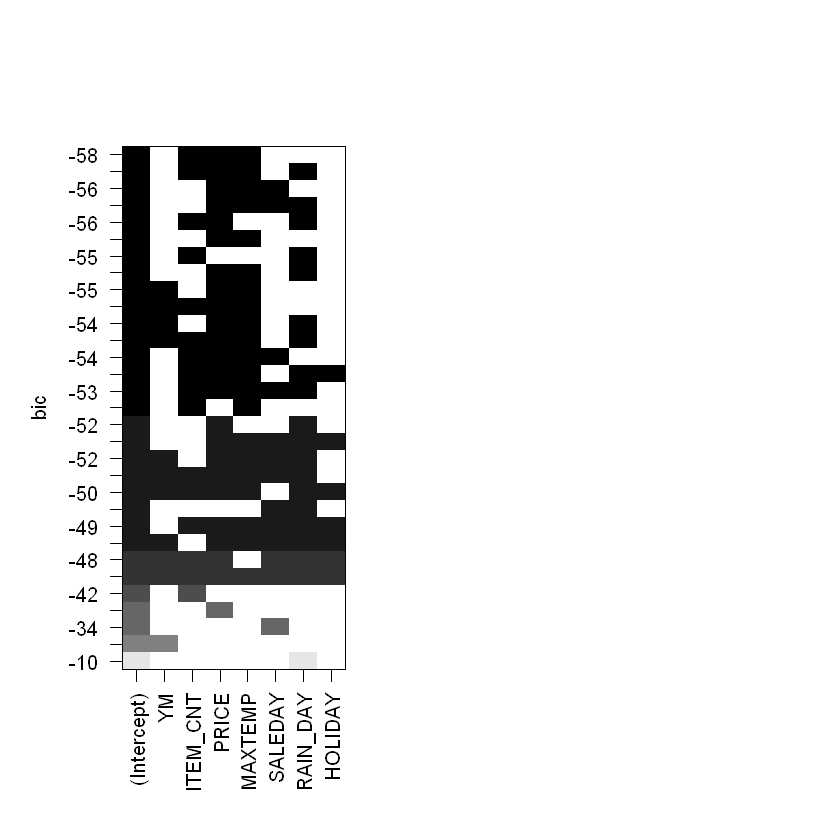

In [45]:
par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [46]:
a = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-441.99 -122.10  -19.42   74.28  552.37 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.943e+05  2.040e+05   1.443  0.15489   
YM          -1.473e+00  1.017e+00  -1.449  0.15333   
ITEM_CNT     3.406e+01  1.929e+01   1.766  0.08312 . 
PRICE        7.551e-01  2.547e-01   2.964  0.00454 **
MAXTEMP      7.608e+00  3.926e+00   1.938  0.05798 . 
SALEDAY      3.064e-03  2.389e-03   1.283  0.20521   
RAIN_DAY     6.821e-03  3.684e-03   1.851  0.06968 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.3 on 53 degrees of freedom
Multiple R-squared:  0.7369,	Adjusted R-squared:  0.7072 
F-statistic: 24.74 on 6 and 53 DF,  p-value: 9.355e-14


In [47]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-422.62 -112.66  -43.05  107.77  574.78 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.054e+03  3.653e+02  -2.885  0.00558 **
ITEM_CNT     2.246e+01  8.909e+00   2.521  0.01462 * 
PRICE        6.854e-01  2.487e-01   2.756  0.00792 **
MAXTEMP      8.875e+00  3.825e+00   2.320  0.02406 * 
RAIN_DAY     6.731e-03  3.692e-03   1.823  0.07374 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.9 on 55 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.7054 
F-statistic: 36.31 on 4 and 55 DF,  p-value: 7.716e-15


In [48]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-443.02 -114.74  -45.85  131.54  592.32 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1188.2848   365.0736  -3.255  0.00193 ** 
ITEM_CNT       23.0316     9.0860   2.535  0.01407 *  
PRICE           0.7479     0.2514   2.975  0.00432 ** 
MAXTEMP        13.6824     2.8273   4.839 1.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207.1 on 56 degrees of freedom
Multiple R-squared:  0.7088,	Adjusted R-squared:  0.6932 
F-statistic: 45.43 on 3 and 56 DF,  p-value: 5.119e-15


In [ ]:
cor(vitamin_data$PRICE, vitamin_data$QTY)

In [ ]:
a = lm(QTY ~ PRICE, vitamin_data)
summary(a)

In [ ]:
plot(vitamin_data$PRICE, vitamin_data$QTY)
abline(a, col = 2)

In [ ]:
vitamin_data

In [ ]:
vitamin_data_new = vitamin_data %>%
    filter(PRICE != '1300')

In [ ]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP, vitamin_data_new)
summary(a)

In [ ]:
cor(vitamin_data_new$PRICE, vitamin_data_new$QTY)

In [ ]:
a = lm(QTY ~ PRICE, vitamin_data_new)
summary(a)

In [ ]:
plot(vitamin_data_new$PRICE, vitamin_data_new$QTY)
abline(a, col = 2)

In [ ]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)

In [ ]:
cor(vitamin_data$ITEM_CNT, vitamin_data$QTY)

In [ ]:
a = lm(QTY ~ ITEM_CNT, vitamin_data)
summary(a)

In [ ]:
plot(vitamin_data$ITEM_CNT, vitamin_data$QTY)
abline(a, col = 2)

In [ ]:
# 비타민 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)

## ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 모델 정리

In [ ]:
# 과즙음료 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)

In [ ]:
leaps = regsubsets(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data, nbest = 5)
summary(leaps)

par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [ ]:
# 차음료 최종 모델
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)

In [ ]:
# 비타민 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)

In [ ]:
fruit_data_2009 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
fruit_data_2010 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
fruit_data_2011 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
fruit_data_2012 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
fruit_data_2013 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

fruit_data_2009

In [ ]:
par(mfrow = c(3,2))
plot(fruit_data_2009$MAXTEMP, fruit_data_2009$QTY)
plot(fruit_data_2010$MAXTEMP, fruit_data_2010$QTY)
plot(fruit_data_2011$MAXTEMP, fruit_data_2011$QTY)
plot(fruit_data_2012$MAXTEMP, fruit_data_2012$QTY)
plot(fruit_data_2013$MAXTEMP, fruit_data_2013$QTY)

In [ ]:
vitamin_data_2009 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
vitamin_data_2010 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
vitamin_data_2011 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
vitamin_data_2012 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
vitamin_data_2013 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

vitamin_data_2009$YM = seq(1:12)
vitamin_data_2010$YM = seq(1:12)
vitamin_data_2011$YM = seq(1:12)
vitamin_data_2012$YM = seq(1:12)
vitamin_data_2013$YM = seq(1:12)

vitamin_data_t = data.frame(vitamin_data_2009$YM, vitamin_data_2009$MAXTEMP)
vitamin_data_t = cbind(vitamin_data_t, vitamin_data_2010$MAXTEMP, vitamin_data_2011$MAXTEMP, vitamin_data_2012$MAXTEMP,
                       vitamin_data_2013$MAXTEMP)
vitamin_data_t$t_mean = apply(vitamin_data_t[-c(1)], 1, mean)

vitamin_data_ = data.frame(vitamin_data_2009$YM, vitamin_data_2009$QTY)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_2010$QTY, vitamin_data_2011$QTY, vitamin_data_2012$QTY, vitamin_data_2013$QTY)

vitamin_data_$mean = apply(vitamin_data_[-c(1)], 1, mean)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_t$t_mean)
colnames(vitamin_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

vitamin_data_

In [ ]:
par(mfrow = c(3, 2))
plot(vitamin_data_2009$MAXTEMP, vitamin_data_2009$QTY)
plot(vitamin_data_2010$MAXTEMP, vitamin_data_2010$QTY)
plot(vitamin_data_2011$MAXTEMP, vitamin_data_2011$QTY)
plot(vitamin_data_2012$MAXTEMP, vitamin_data_2012$QTY)
plot(vitamin_data_2013$MAXTEMP, vitamin_data_2013$QTY)
plot(vitamin_data_$Temp_mean)

In [ ]:
tea_data_2009 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
tea_data_2010 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
tea_data_2011 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
tea_data_2012 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
tea_data_2013 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

tea_data_2009$YM = seq(1:12)
tea_data_2010$YM = seq(1:12)
tea_data_2011$YM = seq(1:12)
tea_data_2012$YM = seq(1:12)
tea_data_2013$YM = seq(1:12)

tea_data_t = data.frame(tea_data_2009$YM, tea_data_2009$MAXTEMP)
tea_data_t = cbind(tea_data_t, tea_data_2010$MAXTEMP, tea_data_2011$MAXTEMP, tea_data_2012$MAXTEMP, tea_data_2013$MAXTEMP)
tea_data_t$t_mean = apply(tea_data_t[-c(1)], 1, mean)

tea_data_ = data.frame(tea_data_2009$YM, tea_data_2009$QTY)
tea_data_ = cbind(tea_data_, tea_data_2010$QTY, tea_data_2011$QTY, tea_data_2012$QTY, tea_data_2013$QTY)

tea_data_$mean = apply(tea_data_[-c(1)], 1, mean)
tea_data_ = cbind(tea_data_, tea_data_t$t_mean)
colnames(tea_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

tea_data_

In [ ]:
par(mfrow = c(3, 2))
plot(tea_data_2009$MAXTEMP, tea_data_2009$QTY)
plot(tea_data_2010$MAXTEMP, tea_data_2010$QTY)
plot(tea_data_2011$MAXTEMP, tea_data_2011$QTY)
plot(tea_data_2012$MAXTEMP, tea_data_2012$QTY)
plot(tea_data_2013$MAXTEMP, tea_data_2013$QTY)
plot(tea_data_$Temp_mean)

In [ ]:
fruit_data_2009$YM = seq(1:12)
fruit_data_2010$YM = seq(1:12)
fruit_data_2011$YM = seq(1:12)
fruit_data_2012$YM = seq(1:12)
fruit_data_2013$YM = seq(1:12)

fruit_data_t = data.frame(fruit_data_2009$YM, fruit_data_2009$MAXTEMP)
fruit_data_t = cbind(fruit_data_t, fruit_data_2010$MAXTEMP, fruit_data_2011$MAXTEMP, fruit_data_2012$MAXTEMP, fruit_data_2013$MAXTEMP)
fruit_data_t$t_mean = apply(fruit_data_t[-c(1)], 1, mean)

fruit_data_ = data.frame(fruit_data_2009$YM, fruit_data_2009$QTY)
fruit_data_ = cbind(fruit_data_, fruit_data_2010$QTY, fruit_data_2011$QTY, fruit_data_2012$QTY, fruit_data_2013$QTY)

fruit_data_

In [ ]:
fruit_data_$mean = apply(fruit_data_[-c(1)], 1, mean)
fruit_data_ = cbind(fruit_data_, fruit_data_t$t_mean)
colnames(fruit_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')
fruit_data_

In [ ]:
fruit_data_1 = fruit_data_[-c(2:6)]
fruit_data_1$group = 'fruit_temp'
vitamin_data_1 = vitamin_data_[-c(2:6)]
vitamin_data_1$group = 'vitamin_temp'
tea_data_1 = tea_data_[-c(2:6)]
tea_data_1$group = 'tea_temp'
data_month = rbind(fruit_data_1, vitamin_data_1, tea_data_1)
head(data_month)

In [ ]:
ggplot(data = data_month) +
    geom_line(aes(x = Temp_mean, y = QTY_mean, group = group, color = group), linetype = 1)

In [ ]:
data_month = as.data.frame(data_month)
data_month$M = as.integer(data_month$M)
head(data_month)

In [ ]:
data_month = data_month %>%
        mutate(season = ntile(data_month$Temp_mean, 4))

In [ ]:
data_month$season = as.factor(data_month$season)
str(data_month)

In [ ]:
a = aov(QTY_mean ~ season * group, data = data_month)
summary(a)

In [ ]:
TukeyHSD(a)

In [ ]:
interaction.plot(data_month$season, data_month$group, data_month$QTY_mean, col = rainbow(3))

In [ ]:
interaction.plot(data_month$group, data_month$season, data_month$QTY_mean, col = rainbow(3))

In [ ]:
data_month

In [ ]:
data_2013 = data  %>% 
                filter(grepl('^2013', YM))

data_2013_fruit = data_2013  %>% 
                    filter(CATEGORY == '과즙음료')
data_2013_vitamin = data_2013  %>% 
                        filter(CATEGORY == '비타민음료')
data_2013_tea = data_2013  %>% 
                    filter(CATEGORY == '차음료')

data_0912 = data  %>% 
                filter(!grepl('^2013', YM))

data_0912_fruit = data_0912  %>% 
                    filter(CATEGORY == '과즙음료')
data_0912_vitamin = data_0912  %>% 
                    filter(CATEGORY == '비타민음료')
data_0912_vitamin = data_0912_vitamin  %>% 
                    filter(PRICE != 1300)

data_0912_tea = data_0912  %>% 
                    filter(CATEGORY == '차음료')

In [ ]:
# 과즙음료 최종 모델
fruit_model = lm(QTY ~ ITEM_CNT + MAXTEMP, data = data_0912_fruit)
summary(fruit_model)

In [ ]:
library(leaps)

In [ ]:
leaps = regsubsets(QTY ~ ITEM_CNT + MAXTEMP, data = data_0912_fruit, nbest = 5)
summary(leaps)

par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [ ]:
# 차음료 최종 모델
tea_model = lm(QTY ~ MAXTEMP + SALEDAY, data = data_0912_tea)
summary(tea_model)

In [ ]:
# 비타민 최종 모델
vitamin_model = lm(QTY ~ ITEM_CNT + MAXTEMP, data_0912_vitamin)
summary(vitamin_model)

## 2013 과즙음료 예측

In [ ]:
fruit_pre = as.data.frame(predict(fruit_model, data_2013_fruit, interval = 'predict'))
fruit_pre = cbind(fruit_pre, data_2013_fruit$QTY)
fruit_pre$acc[fruit_pre$'data_2013_fruit$QTY' >= fruit_pre$lwr & fruit_pre$'data_2013_fruit$QTY' <= fruit_pre$upr] = T
fruit_pre$acc[is.na(fruit_pre$acc)] = F
colnames(fruit_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
fruit_pre

In [ ]:
round(sum(fruit_pre$acc) / dim(fruit_pre)[1], 2)

## 2013 차음료 예측

In [ ]:
tea_pre = as.data.frame(predict(tea_model, data_2013_tea, interval = 'predict'))
tea_pre = cbind(tea_pre, data_2013_tea$QTY)
tea_pre$acc[tea_pre$'data_2013_tea$QTY' >= tea_pre$lwr & tea_pre$'data_2013_tea$QTY' <= tea_pre$upr] = T
tea_pre$acc[is.na(tea_pre$acc)] = F
colnames(tea_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
tea_pre

In [ ]:
round(sum(tea_pre$acc) / dim(tea_pre)[1], 2)

## 2013 비타민 음료 예측

In [ ]:
vitamin_pre = as.data.frame(predict(vitamin_model, data_2013_vitamin, interval = 'predict'))
vitamin_pre = cbind(vitamin_pre, data_2013_vitamin$QTY)
vitamin_pre$acc[vitamin_pre$'data_2013_vitamin$QTY' >= vitamin_pre$lwr & vitamin_pre$'data_2013_vitamin$QTY' <= vitamin_pre$upr] = T
vitamin_pre$acc[is.na(vitamin_pre$acc)] = F
colnames(vitamin_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
vitamin_pre

In [ ]:
round(sum(vitamin_pre$acc) / dim(vitamin_pre)[1], 2)

# 전체

In [ ]:
pred = rbind(fruit_pre, vitamin_pre, tea_pre)
round(sum(pred$acc) / dim(pred)[1], 2)

# 전체 회귀분석

In [ ]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + SALEDAY, data_0912)
summary(a)

In [ ]:
cor(data_0912$PRICE, data_0912$QTY)

In [ ]:
plot(data_0912$PRICE, data_0912$QTY, col = data_0912$CATEGORY)

In [ ]:
pre = as.data.frame(predict(a, data_2013, interval = 'predict'))
pre = cbind(pre, data_2013$QTY)
pre$acc[pre$'data_2013$QTY' >= pre$lwr & pre$'data_2013$QTY' <= pre$upr] = T
pre$acc[is.na(pre$acc)] = F
pre

In [ ]:
round(sum(pre$acc) / dim(pre)[1], 2)